In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import re
import copy

import scipy.stats as ss

import math

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import QuantileTransformer


from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# Notice: Header = None! Can not omit!
df = pd.read_csv("new_train_data.csv")
# df = pd.read_csv("train.csv")
dt = pd.read_csv("test.csv")

In [2]:

df.head()


,id,penalty,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,time,newtime
0,0,none,0.304083,0.0001,417,475,-1,1089,327,4,3,7,0.074798,24.242009,0.409987,0.305729
1,1,l1,0.727744,0.0010,578,569,1,790,373,4,5,7,0.077781,54.626302,3.950953,3.094283
2,2,none,0.745885,0.0100,588,529,2,428,1198,2,5,6,0.030196,17.999964,0.368702,0.354206
3,3,none,0.474605,0.0010,829,103,4,877,313,6,5,7,0.057261,82.257222,1.004559,0.704138
4,4,elasticnet,0.395049,0.0010,167,418,2,216,644,8,5,11,0.073728,95.515601,0.802800,0.502725


In [3]:
df['n_jobs'].unique()

array([-1,  1,  2,  4,  8])

In [4]:
col = 'random_state'
print(max(df[col]))
print(min(df[col]))

1000
0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 16 columns):
id                      400 non-null int64
penalty                 400 non-null object
l1_ratio                400 non-null float64
alpha                   400 non-null float64
max_iter                400 non-null int64
random_state            400 non-null int64
n_jobs                  400 non-null int64
n_samples               400 non-null int64
n_features              400 non-null int64
n_classes               400 non-null int64
n_clusters_per_class    400 non-null int64
n_informative           400 non-null int64
flip_y                  400 non-null float64
scale                   400 non-null float64
time                    400 non-null float64
newtime                 400 non-null float64
dtypes: float64(6), int64(9), object(1)
memory usage: 50.1+ KB


In [6]:
from sklearn.preprocessing import LabelEncoder
def labelEncode(df, key):
    gle = LabelEncoder()
    labelStr = '-labels'
    newLabel = key + labelStr
    labels = gle.fit_transform(df[key])
    mappings = {index: label for index, label in 
                  enumerate(gle.classes_)}
    df[newLabel] = labels

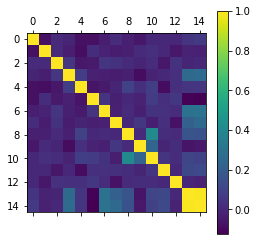

In [7]:
fig1 = plt.matshow(df.corr())
cbar = plt.colorbar(fig1)
plt.show()

In [8]:
df.corr()['time']
df3 = copy.deepcopy(df)
labelEncode(df3, 'penalty')
df3.corr()['time']

id                      0.050309
l1_ratio               -0.013337
alpha                  -0.009759
max_iter                0.264227
random_state            0.043778
n_jobs                 -0.114705
n_samples               0.296451
n_features              0.220124
n_classes               0.166696
n_clusters_per_class   -0.060997
n_informative           0.109154
flip_y                  0.120277
scale                   0.004990
time                    1.000000
newtime                 0.986953
penalty-labels         -0.343493
Name: time, dtype: float64

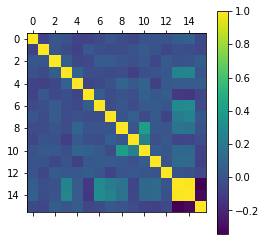

In [9]:
fig2 = plt.matshow(df3.corr())
cbar = plt.colorbar(fig2)
plt.show()

In [10]:
from sklearn.decomposition import PCA
# dfp = copy.deepcopy(df)

# labelEncode(dfp, 'penalty')
# dfp = dfp.drop('penalty', axis = 1)
# pca = PCA(n_components=7)
# pca.fit(dfp)

# dfp = pca.fit_transform(dfp)

# print(pca.explained_variance_ratio_)  

# print(pca.singular_values_) 

## import Data again

## add rows to resample

In [81]:
df = pd.read_csv("new_train_data.csv")
dt = pd.read_csv("new_test_data.csv")
rows = df[df['time'] > 2]
# df2 = df.append(rows)
# df2 = df.append(rows)
# df2 = df.append(rows)
# df2 = df.append(rows)
# df2 = df.append(rows)
# df2 = df.append(rows)
# df = df2
df.head()

,id,penalty,l1_ratio,alpha,max_iter,random_state,n_jobs,n_samples,n_features,n_classes,n_clusters_per_class,n_informative,flip_y,scale,time,newtime
0,0,none,0.304083,0.0001,417,475,-1,1089,327,4,3,7,0.074798,24.242009,0.409987,0.305729
1,1,l1,0.727744,0.0010,578,569,1,790,373,4,5,7,0.077781,54.626302,3.950953,3.094283
2,2,none,0.745885,0.0100,588,529,2,428,1198,2,5,6,0.030196,17.999964,0.368702,0.354206
3,3,none,0.474605,0.0010,829,103,4,877,313,6,5,7,0.057261,82.257222,1.004559,0.704138
4,4,elasticnet,0.395049,0.0010,167,418,2,216,644,8,5,11,0.073728,95.515601,0.802800,0.502725


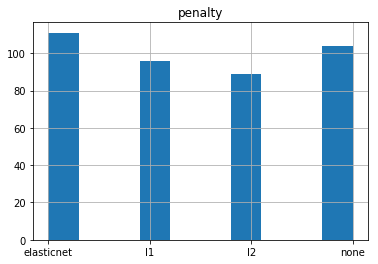

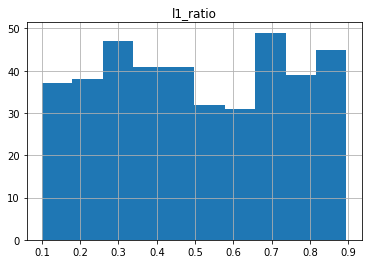

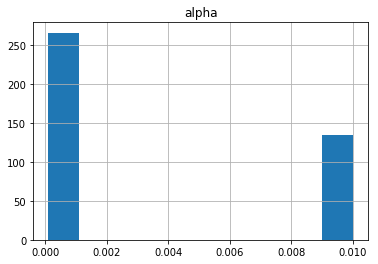

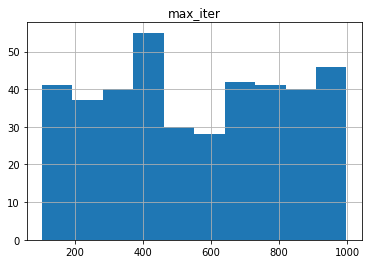

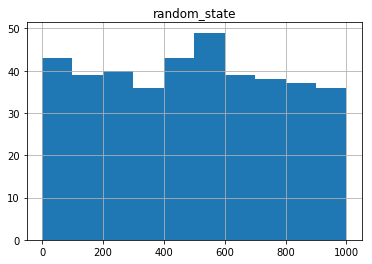

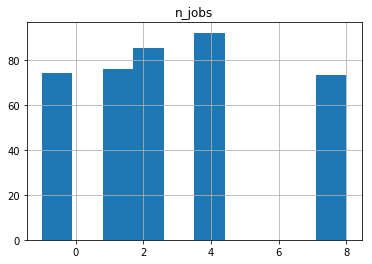

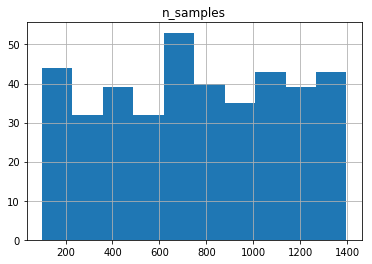

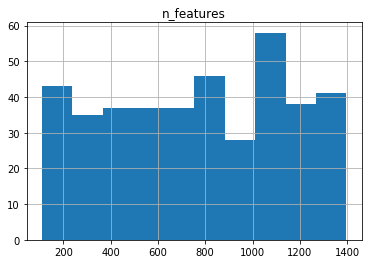

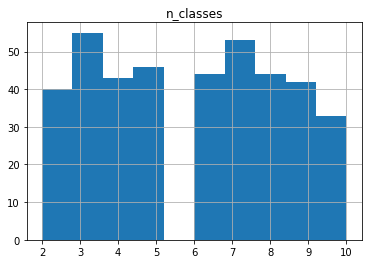

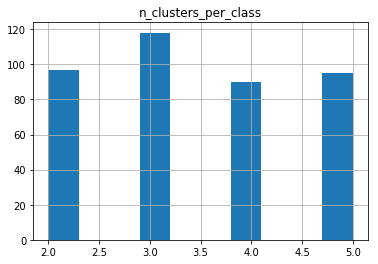

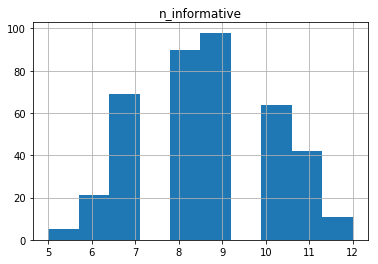

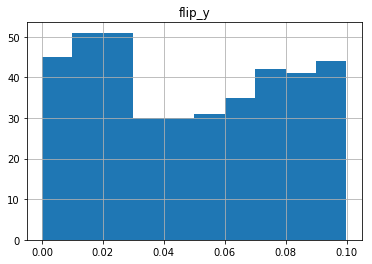

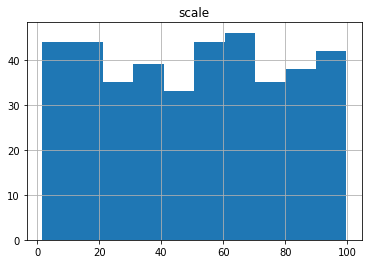

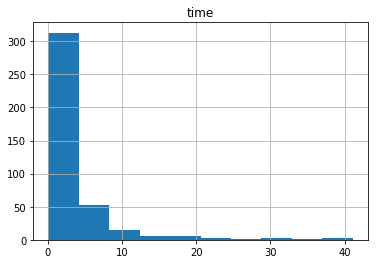

In [12]:
for col in list(df):
    if col == 'id':
        continue
    df[col].hist()
    plt.title(col)
    plt.show()

In [13]:
# dfg = copy.deepcopy(df)
# for col in list(dfg):
#     if col == 'id':
#         continue
#     dfg.loc[dfg['n_jobs'] == -1, ['n_jobs']] = 16
    
#     if str(df[col].dtype) != 'nominal' and str(df[col].dtype) != 'object':  
        
#         lf = np.log10(df[col])
#         lf.hist()
#         plt.title(col)
#         plt.show()

In [101]:
def log(x):
#     return np.log(x)
    return np.log(x)
def restoreSeriesFromLog(array):
    array = np.exp(array)
#     array = np.power(10, array)
    return array

In [118]:

label = 'time'
logLabel = True
ids = dt['id']
scaler = MinMaxScaler()
# scaler = QuantileTransformer(random_state=0)
cnt = 0
def preData(df, withLabel = True):
    global cnt, scaler
#     global cnt
    cnt += 1
    df2 = copy.deepcopy(df)
    labelEncode(df2, 'penalty')
    df2 = df2.drop('penalty', axis = 1)
    df2 = df2.drop('id', axis = 1)
    df2 = df2.drop('random_state', axis = 1)
    
#     df2 = df2.drop('n_clusters_per_class', axis = 1)
    
    df2['multi'] = df2['n_features']*df2['n_samples']*df2['max_iter']
    
#     df2['multi2'] = df2['n_features']*df2['n_samples']
    

    
    MAX = 8
    if withLabel:
        df2.loc[df2['n_jobs'] == -1, ['n_jobs']] = MAX
    else:
        df2.loc[df2['n_jobs'] == -1, ['n_jobs']] = MAX


#     df2['alpha'] = np.log10(df2['alpha'])

#     if df2['n_jobs'] == -1:
#         df2['max_jobs'] = 1
#     else:
#         df2['max_jobs'] = 0
    
   



    if withLabel:
        if logLabel:
            df2[label] = log(df2[label])
#     else:
#         df2['newtime'] = log(df2['newtime'])
    
    
    
    # Log   
    
    df2['n_features'] = log(df2['n_features'])
    df2['n_samples'] = log(df2['n_samples'])
    df2['max_iter'] = log(df2['max_iter'])
    df2['n_jobs'] = log(df2['n_jobs'])
#     df2['n_classes'] = log(df2['n_classes'])
    df2['multi'] = log(df2['multi'])
    
    df2['newtime'] = log(df2['newtime'])
#     df2['n_informative'] = log(df2['n_informative'])
#     df2['flip_y'] = log(df2['flip_y'])
#     df2['alpha'] = log(df2['alpha'])
#     df2['l1_ratio'] = log(df2['l1_ratio'])
#     df2['scale'] = log(df2['scale'])
#     df2['alpha'] = log(df2['alpha'])
    
    


#     df2['penalty-labels'] = log(df2['penalty-labels']+1)
#     df2['penalty-labels'] = df2['penalty-labels']+1
#     df2['n_clusters_per_class'] = np.log(df2['n_clusters_per_class'])
    
#     df2['multi2'] = np.log10(df2['multi2'])
    
    if False:
        Y = df2[label]
#         plt.title("l1_ratio")
#         plt.scatter(df2['l1_ratio'].values, Y.values)
#         plt.show()
        plt.title("penalty-labels")
        plt.scatter(df2['penalty-labels'].values, Y.values)
        plt.show()
        plt.title("flip_y")
        plt.scatter(df2['flip_y'].values, Y.values)
        plt.show()
#         plt.title("alpha")
#         plt.scatter(df2['alpha'].values, Y.values)
#         plt.show()
        plt.title("n_informative")
        plt.scatter(df2['n_informative'].values, Y.values)
        plt.show()
        plt.title("n_jobs")
        plt.scatter(df2['n_jobs'].values, Y.values)
        plt.show()
        plt.title("n_classes")
        plt.scatter(df2['n_classes'].values, Y.values)
        plt.show()
        plt.title("n_features")
        plt.scatter(df2['n_features'].values, Y.values)
        plt.show()
        plt.title("n_samples")
        plt.scatter(df2['n_samples'].values, Y.values)
        plt.show()
        plt.title("max_iter")
        plt.scatter(df2['max_iter'].values, Y.values)
        plt.show()
        plt.title("multi")
        plt.scatter(df2['multi'].values, Y.values)
        plt.show()
#         plt.title("multi2")
#         plt.scatter(df2['multi2'].values, Y.values)
#         plt.show()
    
    
#     df2 = df2.drop('n_features', axis = 1)
#     df2 = df2.drop('n_samples', axis = 1)
#     df2 = df2.drop('max_iter', axis = 1)
#

#     df2 = df2.drop('n_informative', axis = 1)
    
    df2 = df2.drop('n_clusters_per_class', axis = 1)
#     df2 = df2.drop('l1_ratio', axis = 1)
    df2 = df2.drop('alpha', axis = 1)
    df2 = df2.drop('scale', axis = 1)
    
#     df2 = df2.drop('multi', axis = 1)
    
#     df2 = df2.drop('n_jobs')
    
#     df2 = df2.drop('flip_y', axis = 1)

    # Standarize data
    ## init
    
    
#     scaler = MinMaxScaler()
    X = None
    Y = None
    scalerX = None
    
    if withLabel:
        Y = df2[label]
        X = df2.drop([label], axis = 1)
    else:
        X = df2
        
    
    if cnt == 1:
        scaler = scaler.fit(X)
        scalerX = scaler.transform(X)
    else:
#         scaler = scaler.fit(X)
        scalerX = scaler.transform(X)
#     scaler.fit(X)
#     scalerX = X
#     scalerX = scaler.transform(X.values)
    
#     plt.scatter(df2['multi'].values, Y.values)
#     plt.show()
    if False:
        i = 0
        for col in list(df2):
            if i == len(list(df2)) - 1:
                continue
            plt.scatter(scalerX[:, i], Y.values)
            plt.title(col)
            plt.show()
            i +=1
    
    
    if withLabel:
        return X, scalerX, Y
    else:
        return X, scalerX
    
    

X, scalerX, Y = preData(df, True)
TX, scalerTX = preData(dt, False)

In [56]:
print(scalerX)

[[0.25630401 0.61573856 1.         ... 0.00661033 1.         0.62608501]
 [0.78930269 0.75950085 0.         ... 0.08562851 0.33333333 0.64751317]
 [0.81212576 0.76705387 0.32387163 ... 0.00798401 1.         0.73675416]
 ...
 [0.23048873 0.89652821 0.32387163 ... 0.05766526 1.         0.7978414 ]
 [0.54803212 0.83812879 1.         ... 0.02076402 0.66666667 0.83565318]
 [0.37386999 0.59741129 0.         ... 0.00453736 0.66666667 0.66551691]]


In [88]:
print(scalerTX)

None


In [18]:
print(X)

     max_iter    n_jobs  n_samples  n_features  n_classes  n_informative  \
0    2.620136  1.206826   3.037028    2.514548   0.602060       0.845098   
1    2.761928  0.041393   2.897627    2.571709   0.602060       0.845098   
2    2.769377  0.322219   2.631444    3.078457   0.301030       0.778151   
3    2.918555  0.612784   2.943000    2.495544   0.778151       0.845098   
4    2.222716  0.322219   2.334454    2.808886   0.903090       1.041393   
5    2.993877  0.612784   3.144885    2.935003   0.602060       0.778151   
6    2.968016  0.322219   2.958086    2.839478   0.698970       0.778151   
7    2.625312  0.908485   2.830589    2.867467   0.954243       0.903090   
8    2.488551  0.908485   2.697229    3.075912   0.301030       0.954243   
9    2.707570  0.908485   3.139879    2.904716   0.954243       1.000000   
10   2.680336  0.908485   3.071145    3.019947   0.845098       0.903090   
11   2.413300  0.322219   2.934498    2.805501   1.000000       1.041393   
12   2.79098

## Drop column by priori knowledge

In [19]:
# df2 = df2.drop('random_state', axis = 1)

## Deal with special value

In [20]:
# MAX = 32
# df2.loc[df2['n_jobs'] == -1, ['n_jobs']] = MAX

In [21]:
# df2.head()

## Normalization and Mathematic process

In [22]:
# df2['alpha'] = np.log10(df2['alpha'])


In [23]:
# df3 = copy.deepcopy(df2)
# df3['time'] = np.log10(df3['time'])

In [24]:
# df2 = df3

In [25]:
# def restoreDfFromLog(df):
# #     df['time'] = np.exp(df['time'])
#     return df

In [26]:
# Y = df2[label]
# X = df2.drop([label], axis = 1)

In [27]:

# X_train = normalize(X, norm='l2')

# Don't cheat - fit only on training data
 
# testF = normalize(td, norm='l2')

In [64]:
def outputResult(nparray, filename = "Results.csv"):
    if logLabel:
        nparray = restoreSeriesFromLog(nparray)
    result = pd.DataFrame(nparray)
    ans = pd.concat([ids, result], axis = 1)
    ans.rename(columns={0: 'time'}, inplace=True)
    ans[ans < 0] = 0
    ans.rename(columns={'id': 'Id'}, inplace=True)
    ans.to_csv(filename, index = False)

In [65]:
from sklearn.metrics import make_scorer
def restoreMSE(y_true, y_pred):
    mse = mean_squared_error(restoreSeriesFromLog(y_true), restoreSeriesFromLog(y_pred))
    return mse
score = make_scorer(restoreMSE, greater_is_better=False)


In [66]:
def rand_cv_evaluate(model, params_dist,n_iter_search, cv_n, t_X = X, t_Y = Y):
    clf = RandomizedSearchCV(model, params_dist, n_iter=n_iter_search, cv=cv_n, scoring=score )
    clf.fit(t_X, t_Y)
    print(clf.best_params_)
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
    preds = clf.predict(t_X)
    if logLabel:
        preds = restoreSeriesFromLog(preds)
    preds = pd.DataFrame(preds)
    
    preds.to_csv('Rand_Test_result.csv')
    return clf

In [67]:
def cv_evaluate(model, params, cv_n, t_X = X, t_Y = Y):
    clf = GridSearchCV(model, params, cv=cv_n, scoring=score )
    clf.fit(t_X, t_Y)
    print(clf.best_params_)
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
                  % (mean, std * 2, params))
    preds = clf.predict(t_X)
    
    if logLabel:
        preds = restoreSeriesFromLog(preds)
    preds = pd.DataFrame(preds)
    preds.to_csv('Test_result.csv')
    return clf

# Start Modeling

In [32]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas_ml as pdml
import time 
from sklearn.metrics import mean_squared_error

# train, test = train_test_split(df2, test_size=0.2, random_state=42)

# train_Y = train[label]
# train_X = train.drop([label],axis=1)

# test_Y = test[label]
# test_X = test.drop([label],axis=1)

In [33]:
from sklearn import svm, datasets
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import cross_val_score

In [34]:
# dtrain = xgb.DMatrix(train_X.as_matrix(), label = train_Y.tolist())
# dtest = xgb.DMatrix(test_X.as_matrix(), label = test_Y.tolist())

In [35]:
params={
'booster':'gbtree',
'objective': "reg:linear",
'gamma':0,  # paramter to control if do post-prune, the bigger the more conservative
'max_depth':6, # the bigger the more possible to be overfitting
'lambda':1,  # rate of L2 regulatation
'subsample':1, # random sample
'colsample_bytree':1, # column sample rate in generating tree
'min_child_weight':1, 
# default is 1，the smaller of this, the more possible to be overfitting。 
'silent':1 ,#if print log.
 'learning_rate': 0.1,
'eta': 0.1, # similar with learning rate
'seed':0,
'nthread':4,
"n_estimators":100
#'eval_metric': 'auc'
}

In [36]:
num_round = 5
# start_time = time.time()
bst = xgb.train(params, dtrain, num_round)
bst.save_model('xgb.model')
# # make prediction
labels = dtest.get_label()
preds = bst.predict(dtest)
mean_squared_error(list(test_Y), list(preds))

NameError: name 'dtrain' is not defined

In [ ]:
params={
    'base_score': 0.5,
'booster':'gbtree',
'objective': "reg:linear",
'gamma':0.3,  # paramter to control if do post-prune, the bigger the more conservative
'max_depth':7, # the bigger the more possible to be overfitting
'reg_lambda':5,  # rate of L2 regulatation
'subsample':1, # random sample
'colsample_bytree':0.85, # column sample rate in generating tree
'colsample_bylevel':1,
'min_child_weight': 1, 
"scale_pos_weight" :1,
"reg_alpha":6,
 "learning_rate": 0.1,
# default is 1，the smaller of this, the more possible to be overfitting。 
'silent':1 ,#if print log.
'eta': 0.1, # similar with learning rate
'seed':0,
'nthread':4,
"n_estimators":250,
# 'eval_metric': 'nmse'
}
dfm = pdml.ModelFrame(df2, target = label)
train_df, test_df = dfm.ms.train_test_split(test_size=0.2, random_state=42)
estimator = dfm.xgboost.XGBRegressor(**params)
model = train_df.fit(estimator)
model.save_model("ass2.model")
predicted = test_df.predict(estimator)
mean_squared_error(list(test_Y), list(predicted))

In [ ]:
# print(predicted)

In [ ]:

Y.head()

In [ ]:
pd.set_option('max_columns',1000) 
pd.set_option('max_row',1000)

In [ ]:
learning_rate_range = [0.1]
# max depth = 9 is the best according to pre-running
tuned_parameters = [{'max_depth': [7], "learning_rate": learning_rate_range, 
                    'reg_lambda': [5], "reg_alpha":[6] , "gamma": [0.3], "colsample_bytree": [0.85], "min_child_weight":[1],
                     "colsample_bylevel":[1], "scale_pos_weight" : [1], "subsample" : [1], 'n_estimators': [200, 250]}]
# cv means cross-validation
cv = dfm.grid_search.GridSearchCV(dfm.xgb.XGBRegressor(), tuned_parameters, cv=10, scoring='neg_mean_squared_error')
dfm.fit(cv)
a = dfm.grid_search.describe(cv)

In [ ]:
maxval = max(a['mean'])

tol = 0.5
maxval

In [ ]:
estimator = cv.best_estimator_
estimator.save_model('bst.model')

In [ ]:
from xgboost.sklearn import XGBRegressor
params = {'gamma' : [0.1, 100]}
cv1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=140, max_depth=5, 
                                                 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8, objective= 'reg:linear', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = params, scoring='neg_mean_squared_error', cv=5)
# gsearch1.fit(train_X, train_Y)
# gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

In [ ]:
cv1.fit(train_X, train_Y)
print(cv1.best_params_)
print()


In [ ]:

td2.head()

In [ ]:
bst2 = xgb.Booster(model_file='bst.model')
xgb.to_graphviz(bst2, num_trees=10).render("XGB.jpg")

dtest2 = xgb.DMatrix(td2.as_matrix())
preds = bst.predict(dtest2)
result = pd.DataFrame(preds)

ans = pd.concat([ids, result], axis = 1)
ans.rename(columns={0: 'time'}, inplace=True)
ans.rename(columns={'id': 'Id'}, inplace=True)
# should header be false
ans.to_csv("Submission.csv", index = False)

# XGBOOST

In [ ]:
from xgboost.sklearn import XGBRegressor
params={
    'base_score': 0.5,
'booster':'gbtree',
'objective': "reg:linear",
'gamma':0.1,  # paramter to control if do post-prune, the bigger the more conservative
'max_depth':7, # the bigger the more possible to be overfitting
'reg_lambda':1,  # rate of L2 regulatation
'subsample':1, # random sample
'colsample_bytree':1, # column sample rate in generating tree
'colsample_bylevel':1,
'min_child_weight': 1, 
"scale_pos_weight" :1,
"reg_alpha":1,
# default is 1，the smaller of this, the more possible to be overfitting。 
'silent':1 ,#if print log.
'learning_rate': 0.1, # alias of  learning rate
'seed':0,
'nthread':4,
"n_estimators":250, # > a number will be OK, but can not be smaller
# 'eval_metric': 'nmse'
}

In [ ]:
xgbooster = XGBRegressor(**params)
# xgbooster.fit(X, Y)
params = {'gamma' : [0], 'max_depth': list(range(6, 7)), 'reg_lambda': [4], "reg_alpha": [1],
         "colsample_bytree": [1], "n_estimators":[300], "scale_pos_weight": [1], "learning_rate": [0.1] }
cv_xgboost = cv_evaluate(xgbooster, params, 10, scalerX, Y)
model = cv_xgboost.best_estimator_


In [ ]:
model.save_model("bst.model")
result = model.predict(scalerTX)
outputResult(result)

In [ ]:
from scipy.stats import rv_discrete
def generate_uniform(value):
    lenth = len(value)
    rates = [1/lenth]*lenth
    dist = rv_discrete(values=(value, rates))
    return dist
def div_list(lists, div):
    return list(map(lambda x: x/div, lists))

In [ ]:

# gamma = list(range(0, 5))
# gamma_dist = generate_uniform(gamma)


# reg_lambda = list(range(0, 7))
# reg_lambda_dist = generate_uniform(reg_lambda)

# reg_alpha = list(range(0, 7))
# reg_alpha_dist = generate_uniform(reg_alpha)

# n_estimators = list(range(70, 390))
# n_estimators_dist = generate_uniform(n_estimators)

# col_bytree = list(range(7, 10))
# col_bytree = div_list(col_bytree, 10)
# col_bytree_dist = generate_uniform(col_bytree)

# col_bylev = list(range(8, 10))
# col_bylev = div_list(col_bylev, 10)
# col_bylev_dist = generate_uniform(col_bylev)

# min_child = list(range(10, 20))
# min_child = div_list(min_child, 10)
# min_child_dist = generate_uniform(min_child)

# subsample = list(range(5, 10))
# subsample = div_list(subsample, 10)
# subsample_dist = generate_uniform(subsample)

# scale_pos = list(range(8, 12))
# scale_pos = div_list(scale_pos, 10)
# scale_pos_dist = generate_uniform(scale_pos)

# eta = list(range(5, 30))
# eta = div_list(eta, 100)
# eta_dist = generate_uniform(eta)




# param_dist = {"max_depth": sp_randint(5, 12),
#               'gamma' : [0.2],
#               'reg_lambda': sp_randint(0, 7),
#               "reg_alpha": sp_randint(0, 7),
#               "n_estimators":sp_randint(70, 390),
#               "colsample_bytree": [0.8],
#               'colsample_bylevel': [1],
#               'min_child_weight': [1],
#               'subsample': [1],
#               "scale_pos_weight": [1], 
#               'learning_rate': [0.1],
#               }
# xgbooster2 = XGBRegressor(**params)
# n_iter = 20
# cv_xgboost_2 = rand_cv_evaluate(xgbooster, param_dist, n_iter, 10)


In [ ]:
sp_randint(2, 3).rvs()

# SVM

In [ ]:
print(scalerX)

# Neural Network

In [37]:
from sklearn.neural_network import MLPRegressor
regressor = MLPRegressor()
regressor

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [141]:

# lbfgs
# [(i, i, i) for i in range(2, 15)
param_grid = {
              'hidden_layer_sizes': [16, 32, 64, 128],
              'activation': ['relu'],
              'solver': ['lbfgs'],
#               'learning_rate': ['constant'],
#               'learning_rate_init': [0.001],
#               'power_t': [0.5],
              'alpha': [0.005],
              'max_iter': [1000],
              'early_stopping': [True],
#               "random_state": [999],
              'warm_start': [True]}
# regressor = MLPRegressor(hidden_layer_sizes = [84, 42, 21])
regressor = MLPRegressor(max_iter = 1000)
model = regressor.fit(scalerX, Y)
# params = {'max_iter':[500, 800, 1000], "hidden_layer_sizes": }
cv_neural = cv_evaluate(model, param_grid, 10, scalerX, Y)
bst_neural = cv_neural.best_estimator_

{'activation': 'relu', 'alpha': 0.005, 'early_stopping': True, 'hidden_layer_sizes': 16, 'max_iter': 1000, 'solver': 'lbfgs', 'warm_start': True}
-0.352 (+/-0.367) for {'activation': 'relu', 'alpha': 0.005, 'early_stopping': True, 'hidden_layer_sizes': 16, 'max_iter': 1000, 'solver': 'lbfgs', 'warm_start': True}
-0.372 (+/-0.448) for {'activation': 'relu', 'alpha': 0.005, 'early_stopping': True, 'hidden_layer_sizes': 32, 'max_iter': 1000, 'solver': 'lbfgs', 'warm_start': True}
-0.567 (+/-0.881) for {'activation': 'relu', 'alpha': 0.005, 'early_stopping': True, 'hidden_layer_sizes': 64, 'max_iter': 1000, 'solver': 'lbfgs', 'warm_start': True}
-0.483 (+/-0.639) for {'activation': 'relu', 'alpha': 0.005, 'early_stopping': True, 'hidden_layer_sizes': 128, 'max_iter': 1000, 'solver': 'lbfgs', 'warm_start': True}


In [142]:
from sklearn.ensemble import AdaBoostRegressor
ensemble = AdaBoostRegressor(base_estimator=bst_neural, n_estimators=50, learning_rate=0.5, loss= 'linear')
params_ensemble = {
    'learning_rate': [0.5],
    'loss': ['linear']
}
ensemble_model = ensemble.fit(scalerX, Y)
# cv_ensembles = cv_evaluate(ensemble, params_ensemble, 10, scalerX, Y)

In [143]:
print(ensemble_model.score(scalerX, Y))
print(ensemble_model.estimator_errors_)
test_result = ensemble_model.predict(scalerX[:400])
pd.DataFrame(restoreSeriesFromLog(test_result)).to_csv('test_result2.csv')
print(mean_squared_error(restoreSeriesFromLog(test_result[:400]), restoreSeriesFromLog(Y[:400])))

0.9955266095124883
[0.14720828 0.11681667 0.15567755 0.14546222 0.14895849 0.15840894
 0.29777645 0.19757698 0.25306586 0.20583492 0.18367779 0.32457555
 0.19947117 0.29523517 0.16281153 0.22313814 0.24878982 0.25078841
 0.12285601 0.24835837 0.12368163 0.1794841  0.1892324  0.16883308
 0.16756034 0.29605146 0.22025889 0.20853393 0.32121399 0.24925186
 0.31674524 0.36452841 0.17346563 0.14063071 0.33969586 0.12443497
 0.18421297 0.22691954 0.13156339 0.19545481 0.28697563 0.39456281
 0.27820895 0.15735415 0.23239261 0.26419307 0.31212995 0.18487134
 0.34489484 0.12727661]
0.15130669071187913


In [78]:
print(scalerTX)

None


In [123]:
bst_neural = cv_neural.best_estimator_
preds = bst_neural.predict(scalerTX)
outputResult(preds)

In [ ]:
bst_neural2 = cv_ensembles.best_estimator_
preds2 = bst_neural2.predict(scalerTX)
outputResult(preds2)

In [144]:
preds3 = ensemble_model.predict(scalerTX)

outputResult(preds3)

# SVM

In [125]:

params = {"C":[2, 4, 6, 16,32, 64, 128, 256, 512]}
# params = {"C":[1, 2], "epsilon": [0.04, 0.05, 0.06],  "tol":[0.001, 0.01, 0.0001], "shrinking" : [True]}
svr = svm.SVR(**{'gamma' : "auto", })
print(svr)

model = svr.fit(scalerX, Y)
cv_svm = cv_evaluate(model, params, 10, scalerX, Y)
model = cv_svm.best_estimator_

result = model.predict(scalerTX)
outputResult(result)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
{'C': 256}
-0.823 (+/-1.026) for {'C': 2}
-0.526 (+/-0.600) for {'C': 4}
-0.501 (+/-0.603) for {'C': 6}
-0.424 (+/-0.582) for {'C': 16}
-0.426 (+/-0.721) for {'C': 32}
-0.430 (+/-0.847) for {'C': 64}
-0.403 (+/-0.827) for {'C': 128}
-0.366 (+/-0.573) for {'C': 256}
-0.379 (+/-0.521) for {'C': 512}


# Linear Regression

In [130]:
from sklearn import linear_model
reg = linear_model.Lasso(alpha = 0.001)
reg.fit(scalerX, Y)
print(reg.coef_)
params = {"alpha": [0.01, 0.001]}
cv_svm = cv_evaluate(reg, params, 10, scalerX, Y)
model = cv_svm.best_estimator_
result = model.predict(scalerTX)
outputResult(result)

[-0.01190079  0.08086242 -0.05513802  0.06943337 -0.06578393  0.0463587
  0.03625993 -0.00653284  5.96955415 -0.24599001  0.        ]
{'alpha': 0.001}
-1.042 (+/-1.443) for {'alpha': 0.01}
-0.502 (+/-0.625) for {'alpha': 0.001}


# Bayesian Regression

In [ ]:
from sklearn import linear_model
clf = linear_model.BayesianRidge()
clf.fit(scalerX, Y)
params = {"n_iter": [300, 3000]}
cv_svm = cv_evaluate(clf, params, 10, scalerX, Y)
model = cv_svm.best_estimator_
result = model.predict(scalerTX)
outputResult(result)


In [ ]:
clf = linear_model.ARDRegression()
clf.fit(scalerX, Y)
params = {"n_iter": [300]}
#           'alpha_1':[1e-6, 1e-5, 1e-7], 'alpha_2':[1e-6, 1e-5, 1e-7],'lambda_1':[1e-6, 1e-5, 1e-7], 'lambda_2':[1e-6, 1e-5, 1e-7]}
cv_svm = cv_evaluate(clf, params, 10, scalerX, Y)